In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy as sc
pleiades=pd.read_csv("G:\IITB\ktittika\stardata.csv")
datalist=list(pleiades)
#print(pleiades)

print(pleiades)  #to print the whole dataset
pleiades.head(3) #first 3 rows from top
pleiades.tail(3) #last 3 rows from bottom
pleiades.shape   #shape of the matrix (rows X columns)
pleiades.size    #total numbers of elements in matrix OR # number of data elements
len(pleiades)    #total number of rows in given data set
print(datalist)  #first row from pleiades
pleiades.columns # to get heading for column with index 2

## to print an entire column
print(type(pleiades['Parallax']))
print(pleiades['Parallax'])

pleiades[['RA','Parallax']][:5]  # get any two columns and their frist five row elemnets using [:5]
pleiades['RA'][1:5] # get first five elements from any columns
pleiades['RA'][3] # get 3rd elements from column RA

## sorting 
pleiades.sort_values('A_magnitude')      sort the A_magnitude column from least to higehst

## removal of NaN rows

In [2]:
pleiades2=pleiades.dropna()   # free from NaN values

## Allocating the columns to arrays

In [3]:
ra=pleiades2['RA'].values
dec=pleiades2['Declination'].values
par_mas=pleiades2['Parallax'].values
par=par_mas/1000
ap_mag=pleiades2['A_magnitude'].values
AU2PAR=4.84814/1000000; #unit conversion for distance calculaion
#print(par)

In [4]:
## distance
d = np.zeros((196,1))
for i in range(0,196):
    d[i]=1/(par[i])
#print(d)

In [5]:
## absolute magnitude
abs_mag = np.zeros((196,1))
for i in range(0,196):
    abs_mag[i]=ap_mag[i]+5-5*np.log10(d[i])
#print(abs_mag)

(array([ 1.,  1.,  1.,  0.,  2.,  3.,  1.,  3.,  0.,  2.,  1.,  4.,  2.,
         5.,  4.,  3.,  1.,  1.,  3., 11.,  5.,  9.,  3.,  1.,  5.,  3.,
         6.,  4.,  7.,  7.,  4.,  2.,  9.,  4.,  4.,  8.,  4.,  8.,  4.,
         3., 11.,  5.,  6.,  5.,  1.,  6.,  3.,  2.,  3.,  5.]),
 array([-2.71998553, -2.53965415, -2.35932276, -2.17899138, -1.99866   ,
        -1.81832862, -1.63799724, -1.45766586, -1.27733448, -1.0970031 ,
        -0.91667172, -0.73634034, -0.55600896, -0.37567758, -0.1953462 ,
        -0.01501482,  0.16531656,  0.34564794,  0.52597932,  0.70631071,
         0.88664209,  1.06697347,  1.24730485,  1.42763623,  1.60796761,
         1.78829899,  1.96863037,  2.14896175,  2.32929313,  2.50962451,
         2.68995589,  2.87028727,  3.05061865,  3.23095003,  3.41128141,
         3.59161279,  3.77194418,  3.95227556,  4.13260694,  4.31293832,
         4.4932697 ,  4.67360108,  4.85393246,  5.03426384,  5.21459522,
         5.3949266 ,  5.57525798,  5.75558936,  5.93592074,

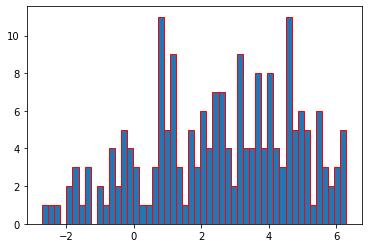

In [6]:
plt.hist(abs_mag, edgecolor="red", bins=50)

In [7]:
s1=min(abs_mag)
s2=max(abs_mag)
s_weight = np.zeros((196,1))
for i in range(0,196):
    s_weight[i]=15-14*(abs_mag[i]-s1)/(s2-s1)
#print(s_weight)

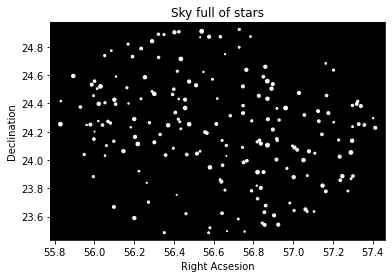

In [8]:
ax = plt.axes()
ax.set_facecolor("black")
plt.scatter(ra,dec,s=s_weight,color='w')
plt.title('Sky full of stars')
plt.xlabel('Right Acsesion')
plt.ylabel('Declination')
plt.xlim(min(ra)-0.05,max(ra)+0.05)
plt.ylim(min(dec)-0.05,max(dec)+0.05)
plt.show()